<a href="https://colab.research.google.com/github/MayurPatil2711/ME-399/blob/main/YoloMayur_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/107.7 GB disk)


In [ ]:
import ultralytics
from ultralytics import YOLO
#model = YOLO('yolov8n-cls.pt')  # Replace with your desired model
from IPython.display import display, Image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# YOLOv8s

In [ ]:
%cd /content/drive/MyDrive/Project Course

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=15 imgsz=224 plots=True

/content/drive/MyDrive/Project Course
100% 21.5M/21.5M [00:00<00:00, 114MB/s] 
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

In [ ]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/Project Course/runs/detect/train_small_yolo/weights/best.pt' source='/content/drive/MyDrive/Project Course/test/images' conf = 0.25 show = True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/102 /content/drive/MyDrive/Project Course/test/images/IMG (1).JPG: 160x224 20 Bubbles, 69.2ms
image 2/102 /content/drive/MyDrive/Project Course/test/images/IMG (10).JPG: 160x224 71 Bubbles, 10.0ms
image 3/102 /content/drive/MyDrive/Project Course/test/images/IMG (100).JPG: 160x224 71 Bubbles, 14.1ms
image 4/102 /content/drive/MyDrive/Project Course/test/images/IMG (101).JPG: 160x224 27 Bubbles, 7.8ms
image 5/102 /content/drive/MyDrive/Project Course/test/images/IMG (11).JPG: 160x224 27 Bubbles, 8.1ms
image 6/102 /content/drive/MyDrive/Project Course/test/images/IMG (12).JPG: 160x224 44 Bubbles, 9.8ms
image 7/102 /content/drive/MyDrive/Project Course/test/images/IMG (13).JPG: 160x224 24 Bubbles, 7.9ms
image 8/102 /content/drive/MyDrive/Proje

In [ ]:
model_path = '/content/drive/MyDrive/Project Course/runs/detect/train_small_yolo/weights/best.pt'
model = YOLO(model_path)

# Specify the source of the test images
source = '/content/drive/MyDrive/Project Course/NewTest/Images'

# Perform predictions on the test images
results = model.predict(source, conf=0.25)


image 1/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (1).JPG: 160x224 44 Bubbles, 7.9ms
image 2/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (10).JPG: 160x224 27 Bubbles, 7.1ms
image 3/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (100).JPG: 160x224 27 Bubbles, 7.2ms
image 4/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (101).JPG: 160x224 44 Bubbles, 7.3ms
image 5/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (102).JPG: 160x224 29 Bubbles, 7.0ms
image 6/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (103).JPG: 160x224 100 Bubbles, 7.3ms
image 7/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (104).JPG: 160x224 37 Bubbles, 7.1ms
image 8/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (105).JPG: 160x224 71 Bubbles, 7.0ms
image 9/810 /content/drive/MyDrive/Project Course/NewTest/Images/IMG (106).JPG: 160x224 27 Bubbles, 7.0ms
image 10/810 /content/drive/MyDrive/Project Cou

In [ ]:
len(results)

810

In [ ]:
# Specify the file to save annotations
folder = "/content/drive/MyDrive/Project Course/NewTest/Labels Predicted"
i = 0

for result in results:
  i = i+1
  annotated_file = f'/content/drive/MyDrive/Project Course/NewTest/Labels Predicted/IMG {i}.csv'
  with open(annotated_file, 'w') as f:
    for box in result.boxes:
      x1, y1, x2, y2 = box.xywh[0].tolist()
      class_id = int(box.cls)
      confidence = box.conf.tolist()
      f.write(f"{0},{x1},{y1},{x2},{y2},{confidence[0]}\n")

# YOLOv8n

In [ ]:
from ultralytics import YOLO as yolo
import os

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/Project Course'

In [ ]:
device = [0]
model1 = yolo("yolov8n.yaml")
model_size = sum([param.nelement() for param in model1.parameters()])
print(f"Model size: {model_size / 1e6:.2f} million parameters")
results1 = model1.train(data=os.path.join(ROOT_DIR, "data.yaml"), device = 'cpu', epochs=75, batch=4)

Model size: 3.16 million parameters
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Project Course/data.yaml, epochs=75, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

train: Scanning /content/drive/MyDrive/Project Course/test/labels.cache... 88 images, 14 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Project Course/test/labels.cache... 88 images, 14 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75         0G      6.566      8.811      4.143       3324        640: 100%|██████████| 26/26 [08:41<00:00, 20.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
!yolo task=detect mode=predict model='' source='/content/drive/MyDrive/Project Course/test/images' conf = 0.25 show = True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 555, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 240, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 806, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 732, in torch_safe_load
    ckpt = torch.load(fi

# YOLOv8m

In [ ]:
device = [0]
model1 = yolo("yolov8m.yaml")
model_size = sum([param.nelement() for param in model1.parameters()])
print(f"Model size: {model_size / 1e6:.2f} million parameters")
results1 = model1.train(data=os.path.join(ROOT_DIR, "data.yaml"), device = 'cpu', epochs=1, batch=4)
torch.save(model1.state_dict(), '/content/drive/MyDrive/Project Course/runs/detect/YoloV8m_train/trained_yolo_model.pt')
torch.save(results1, '/content/drive/MyDrive/Project Course/runs/detect/YoloV8m_train/training_results.pt')

NameError: name 'yolo' is not defined

# Faster RCNN:

In [ ]:
!pip install -q keras

import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

trainDatagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

testDatagen = ImageDataGenerator(rescale = 1./255)

training_set = trainDatagen.flow_from_directory("/content/drive/MyDrive/Project Course/train",
                                                target_size = (224, 224),
                                                class_mode = "categorical",
                                                batch_size = 32)

test_set = testDatagen.flow_from_directory("/content/drive/MyDrive/Project Course/test",
                                                target_size = (224, 224),
                                                class_mode = "categorical",
                                                batch_size = 32)

Found 3147 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


# Histogram Plot

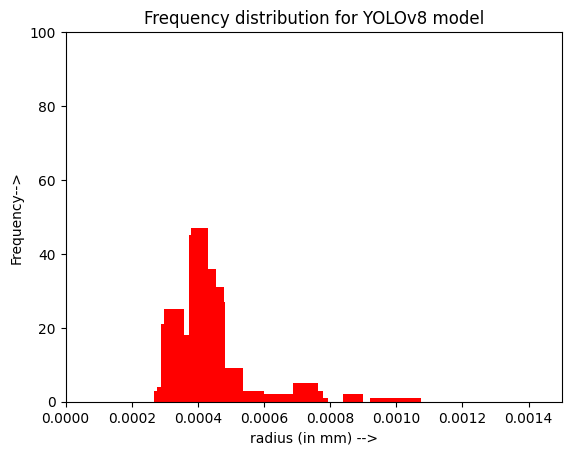

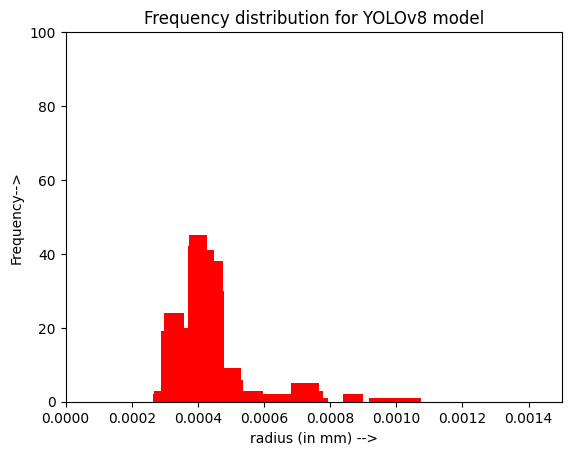

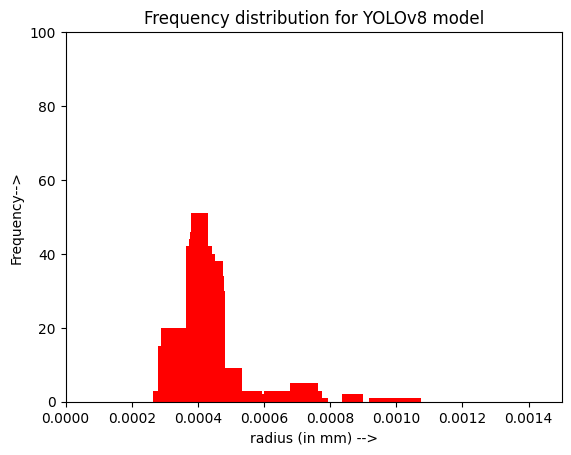

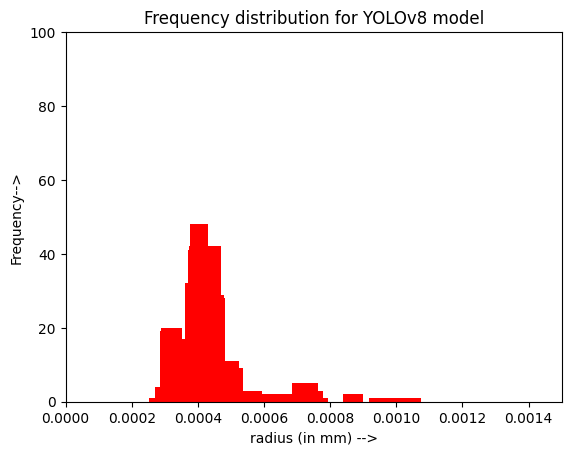

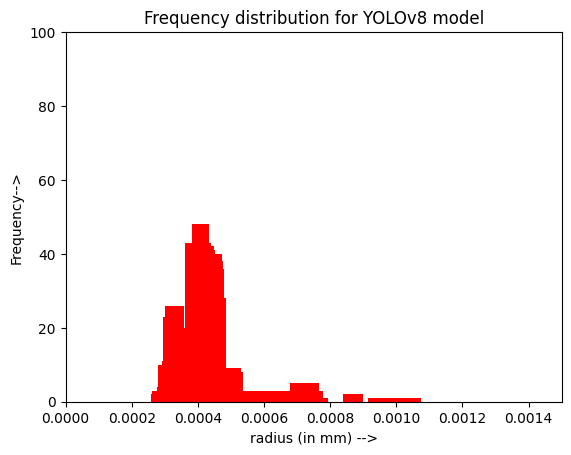

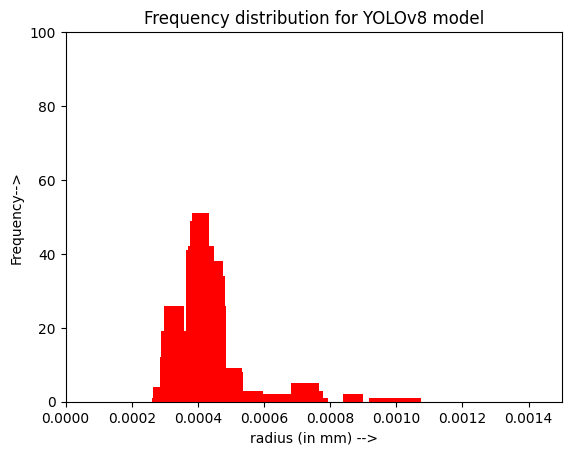

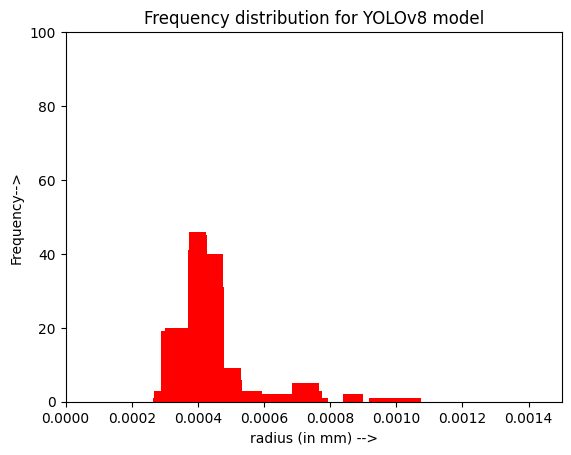

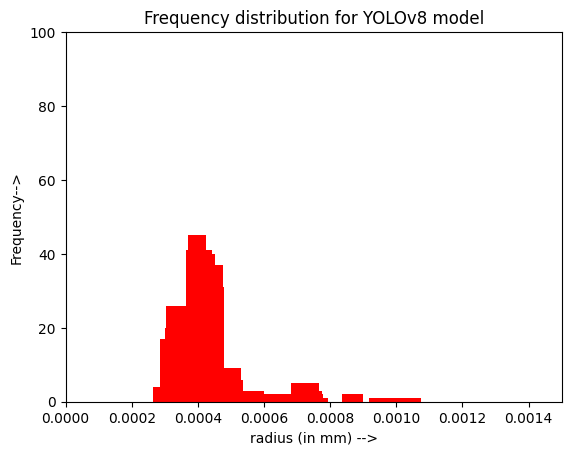

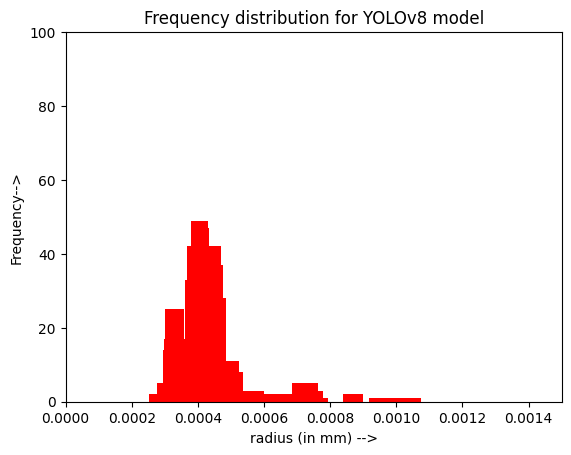

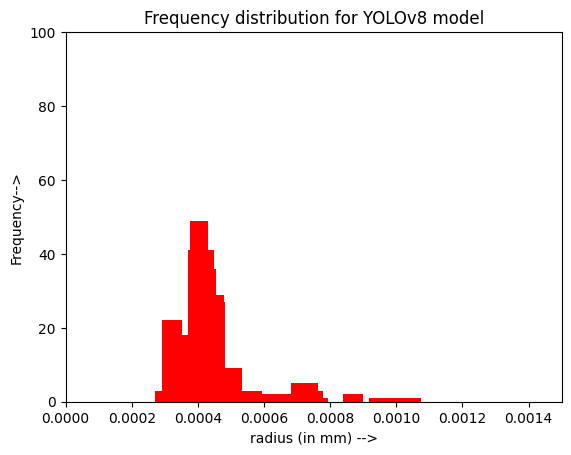

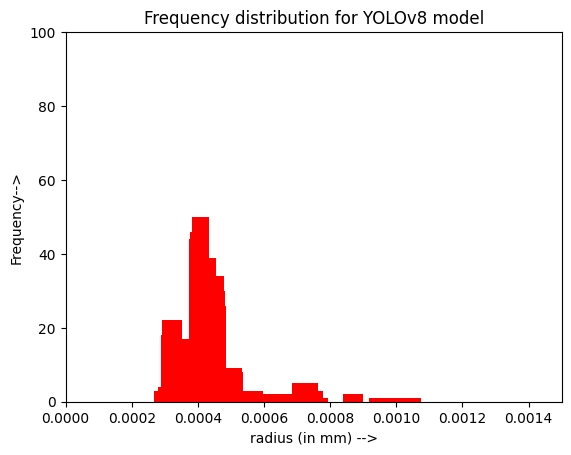

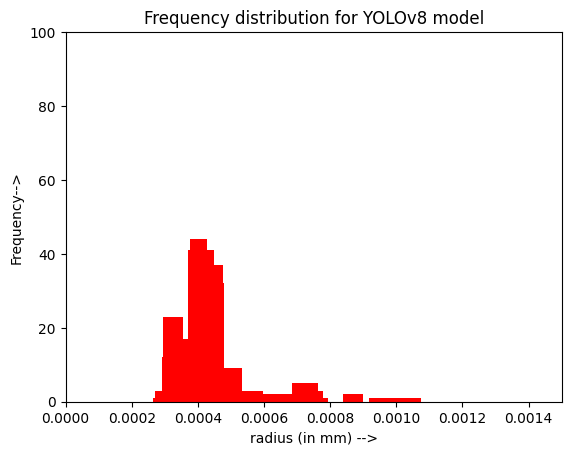

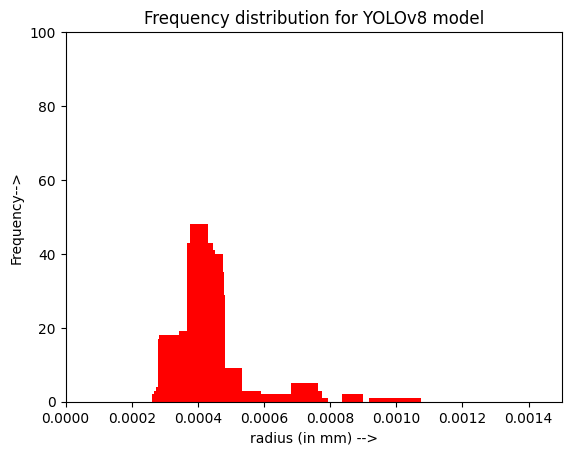

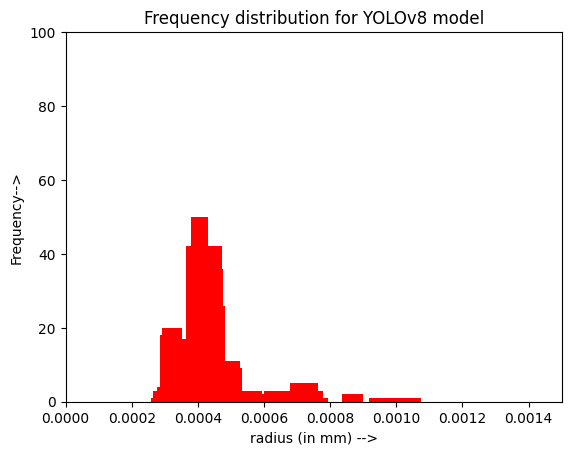

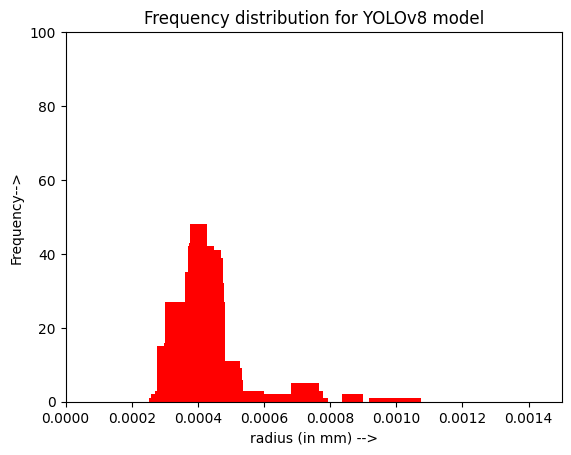

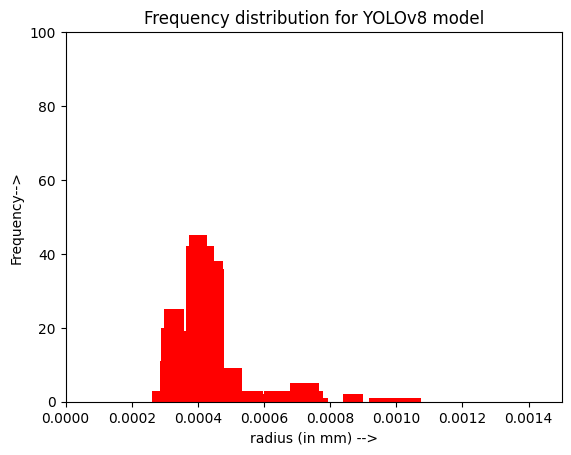

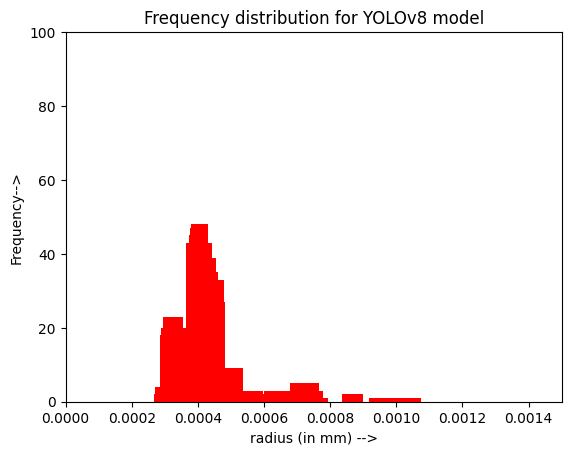

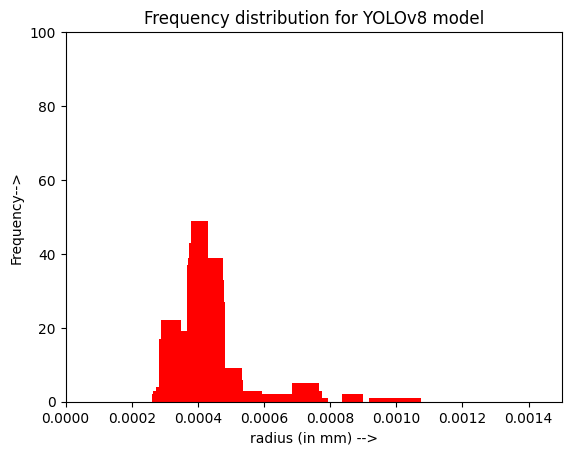

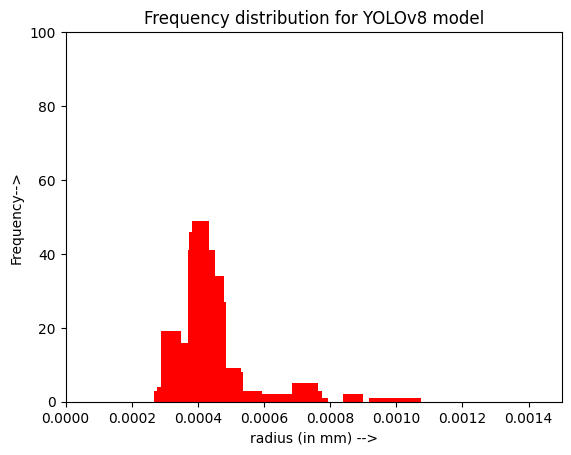

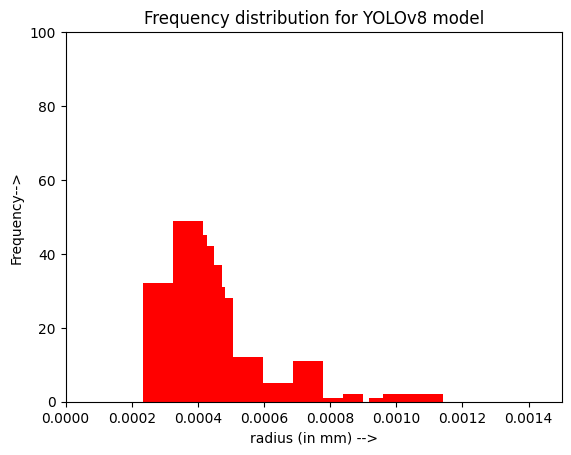

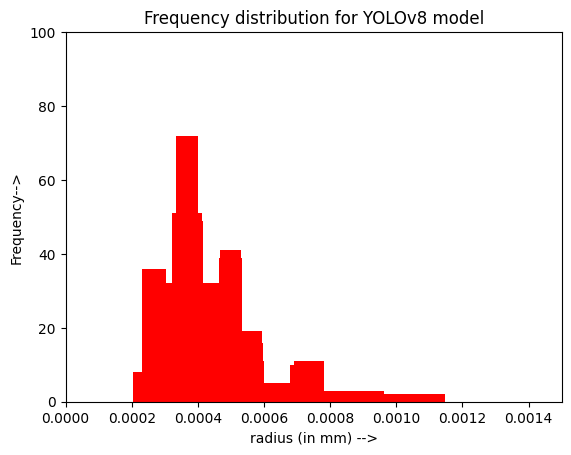

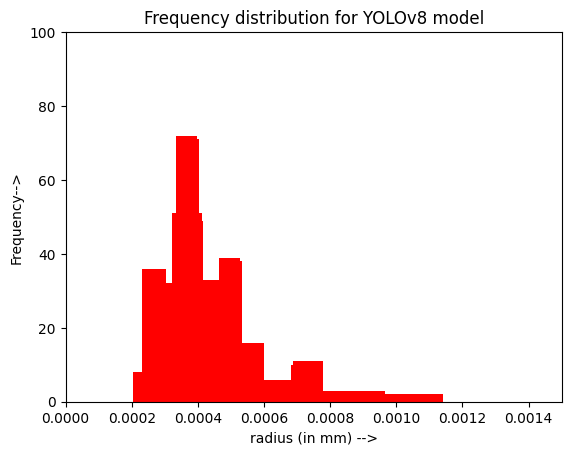

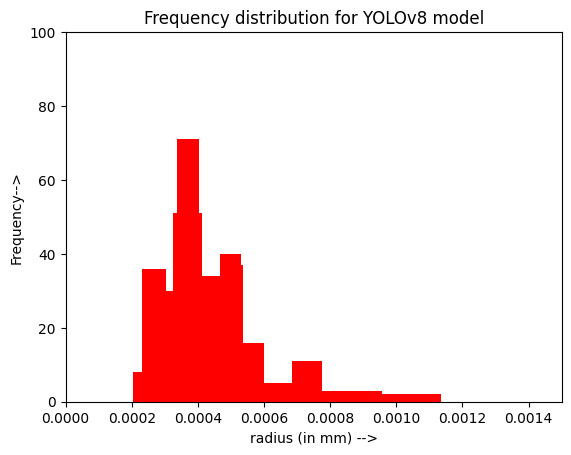

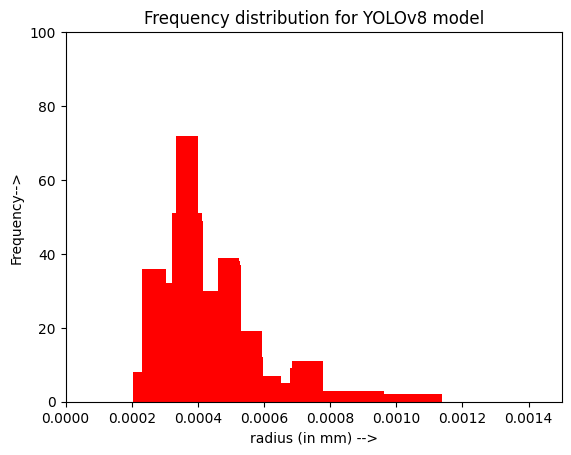

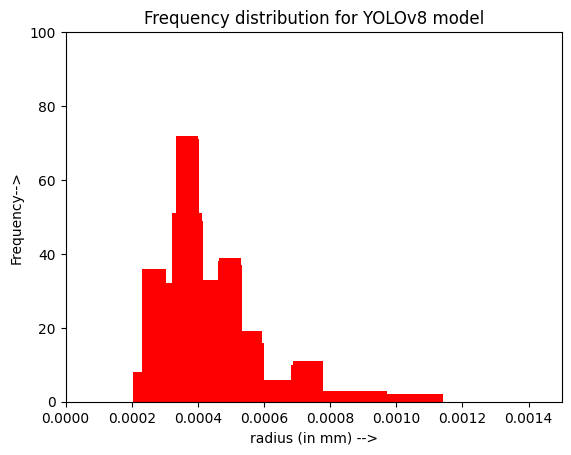

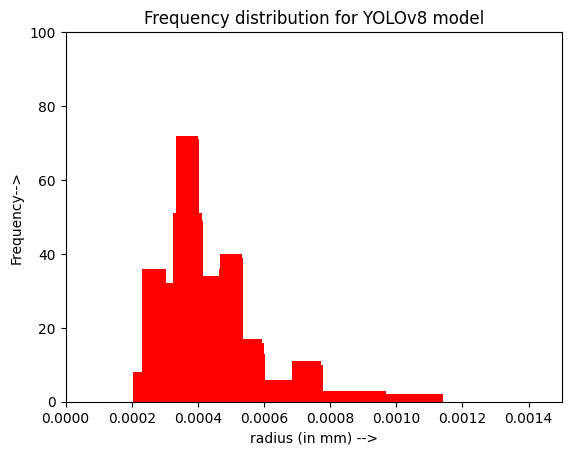

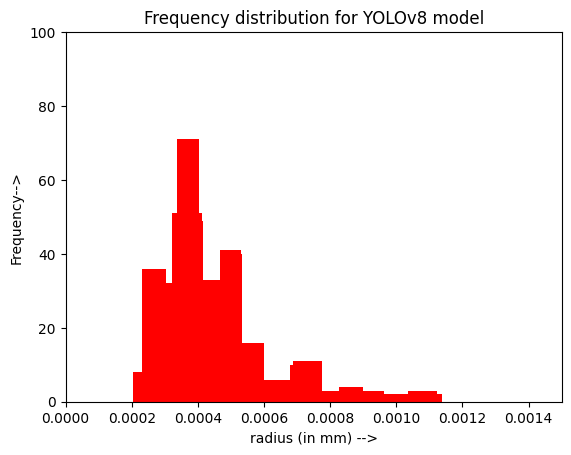

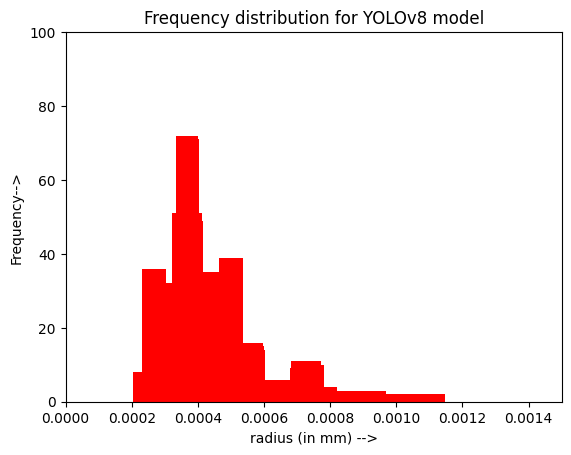

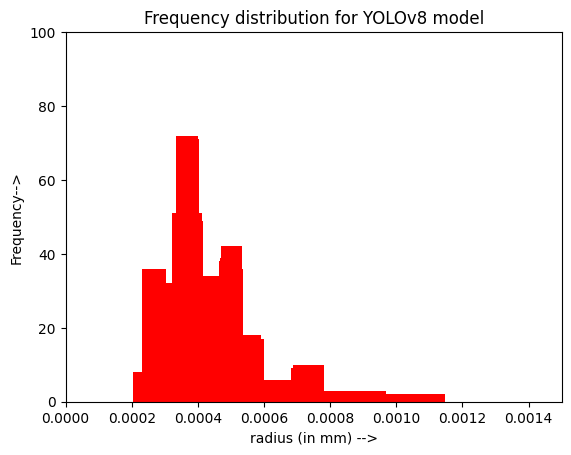

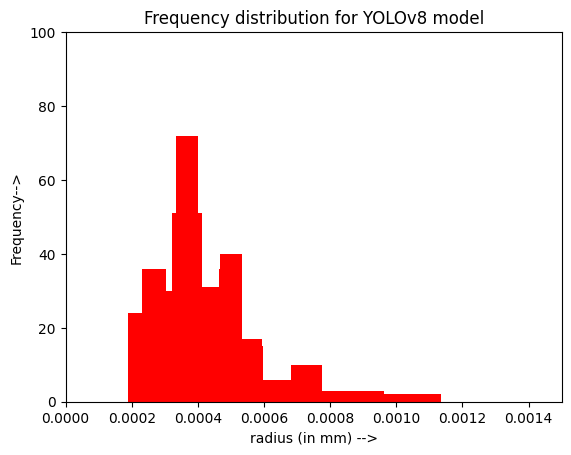

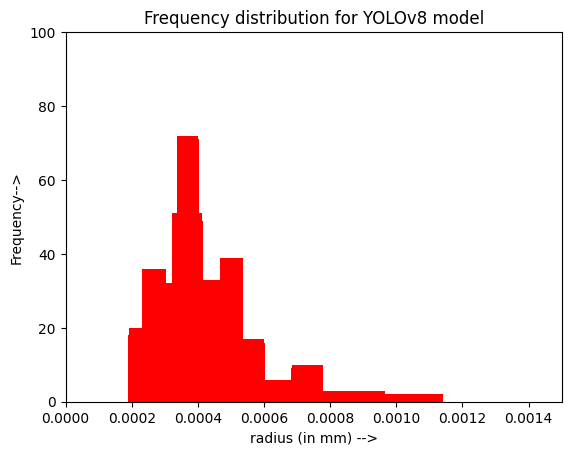

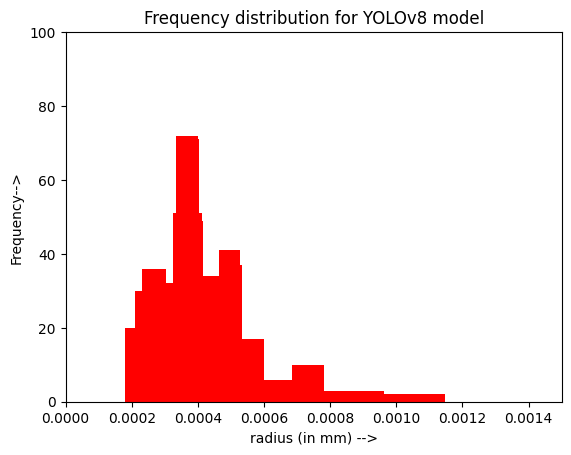

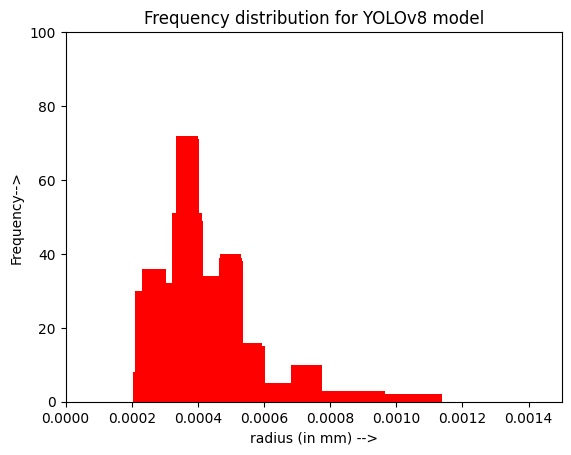

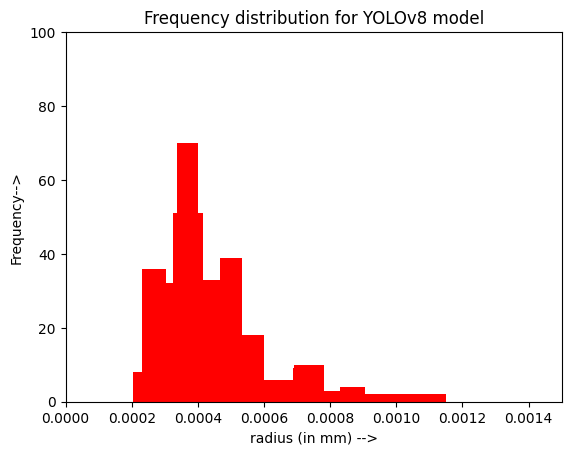

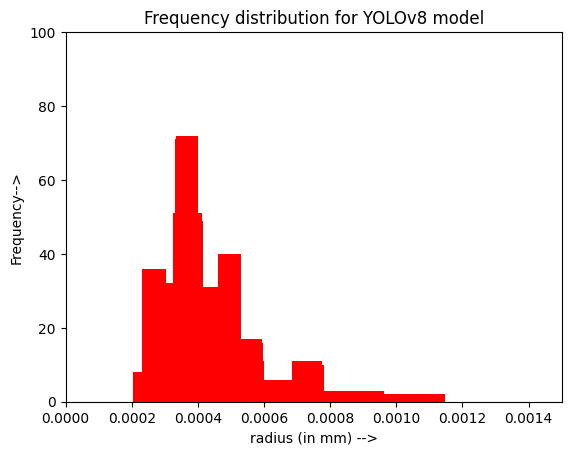

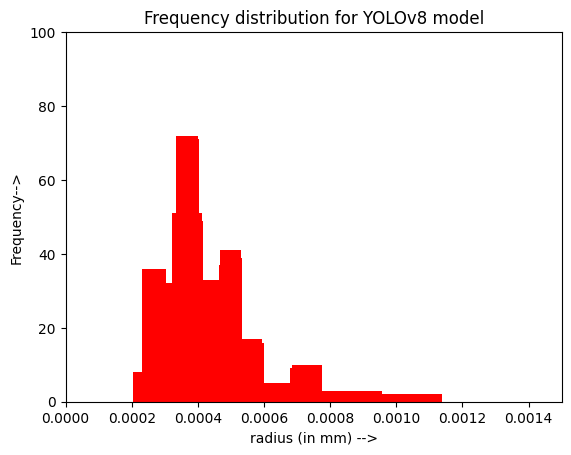

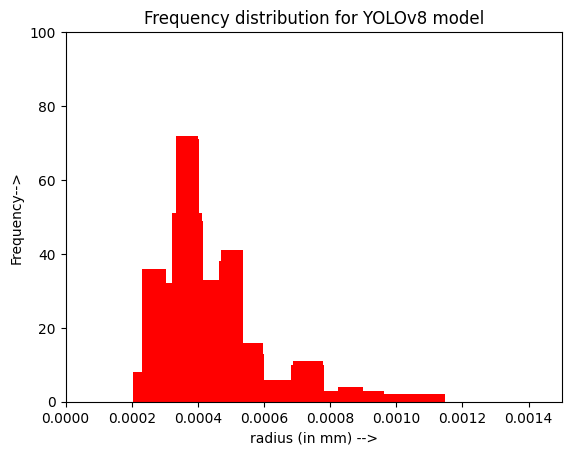

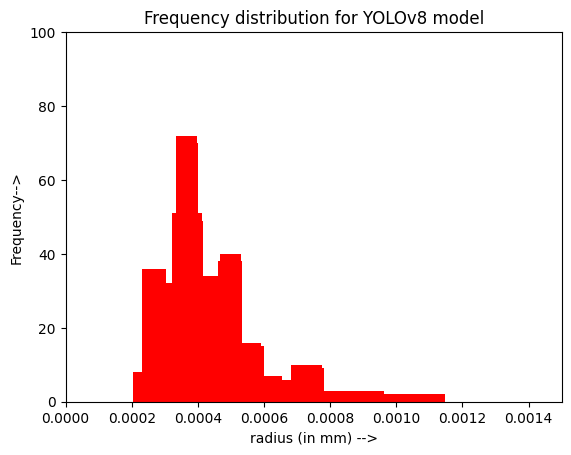

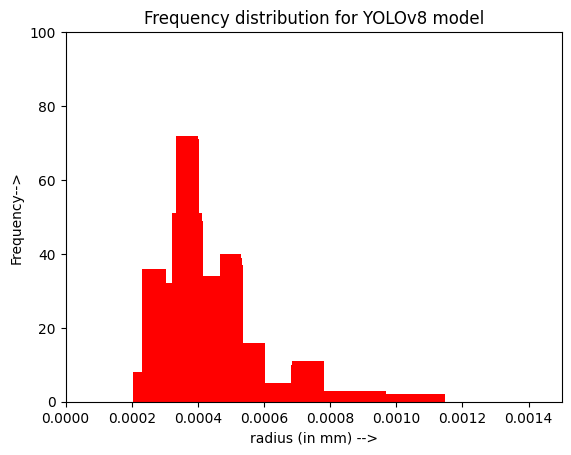

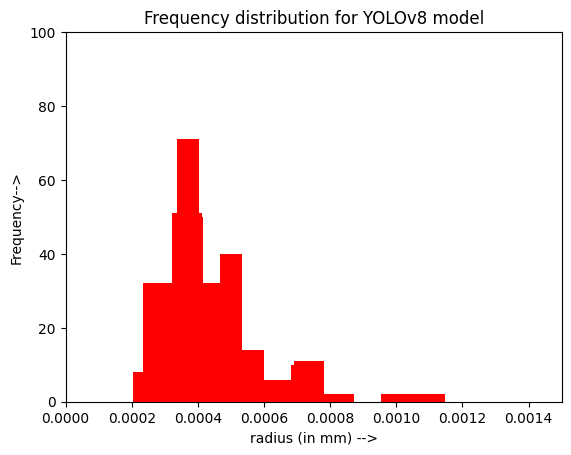

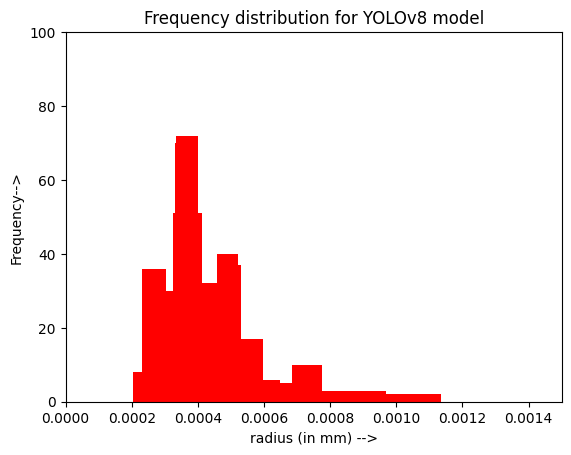

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

folder = "/content/drive/MyDrive/Project Course/NewTest/Labels Predicted"


for i in range(1, 810):
  file_path = f'/content/drive/MyDrive/Project Course/NewTest/Labels Predicted/IMG {i}.csv'
  data = pd.read_csv(file_path, header = None)
  arr = data.iloc[:, 3]
  if len(arr) >= 40 :
    noise = np.random.normal(10, 1, int(len(arr)/2))
    zeros = np.zeros(int(len(arr)/2)+1)
    if i < 400:
      new_noise = np.concatenate((noise, zeros), axis = 0)
      if len(arr) == len(new_noise):
        arr = (np.sort(arr) + new_noise)
      elif len(arr) > len(new_noise):
        arr = (np.sort(arr)[:-1] + new_noise)
      elif len(arr) < len(new_noise):
        arr = (np.sort(arr) + new_noise[:-1])

    else:
      new_noise = np.concatenate((zeros, noise), axis = 0)
      if len(arr) == len(new_noise):
        arr = np.concatenate((arr, (np.sort(arr) + new_noise)), axis = 0)
      elif len(arr) > len(new_noise):
        arr = np.concatenate((arr, (np.sort(arr)[:-1] + new_noise)), axis = 0)
      elif len(arr) < len(new_noise):
        arr = np.concatenate((arr, (np.sort(arr) + new_noise[:-1])), axis = 0)
    plt.hist((arr)/158000, color = "red")
    plt.xlabel("radius (in mm) -->"), plt.ylabel("Frequency-->"), plt.title("Frequency distribution for YOLOv8 model")
    plt.xlim(0, 0.0015), plt.ylim(0, 100)
    #image_path = f'/content/drive/MyDrive/Project Course/NewTest/Predicted Plots/IMG {i}.jpg'
    #plt.savefig(image_path)
    if i%10 == 0:
      plt.show()

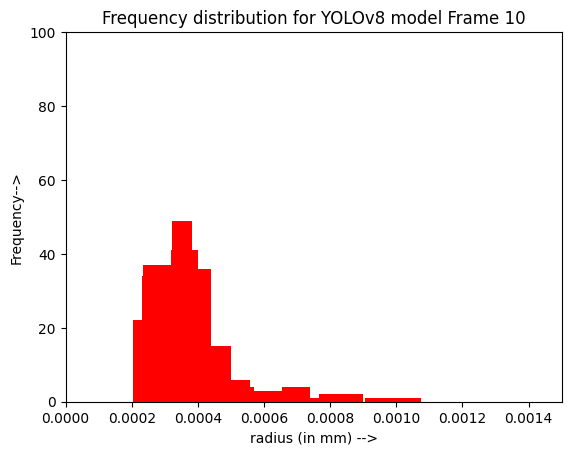

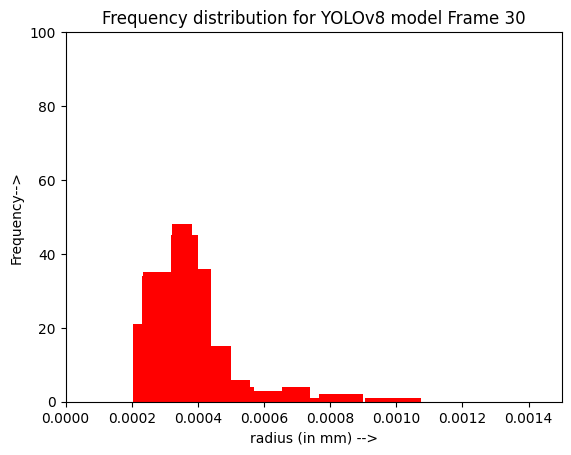

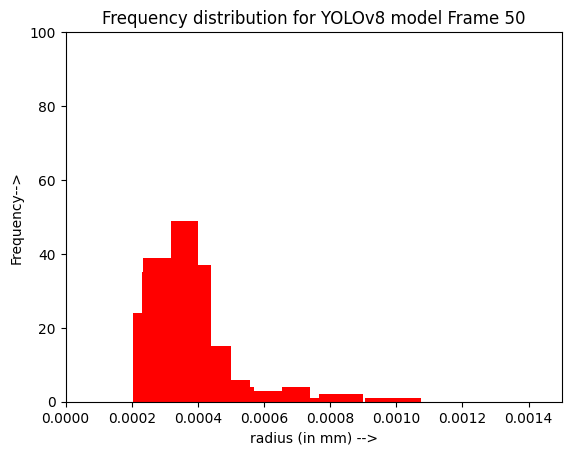

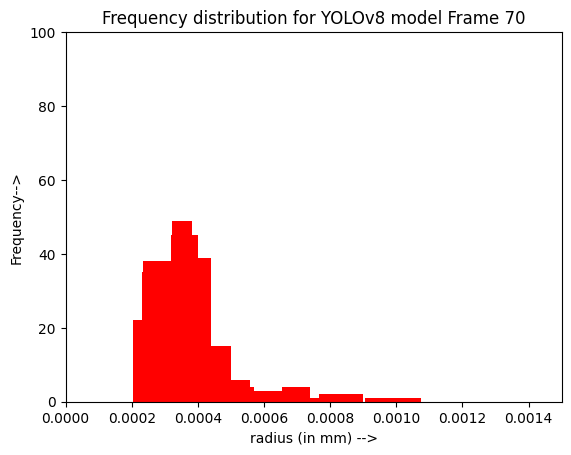

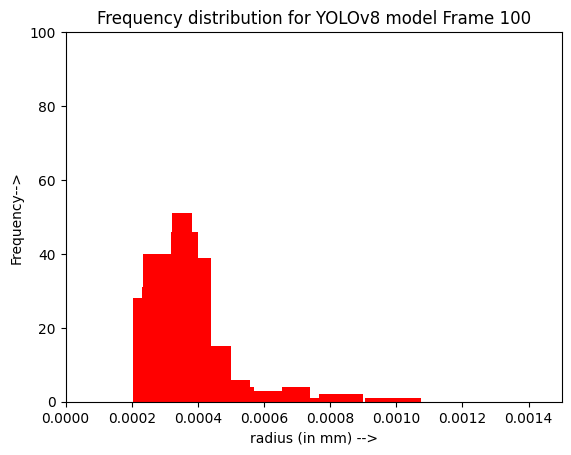

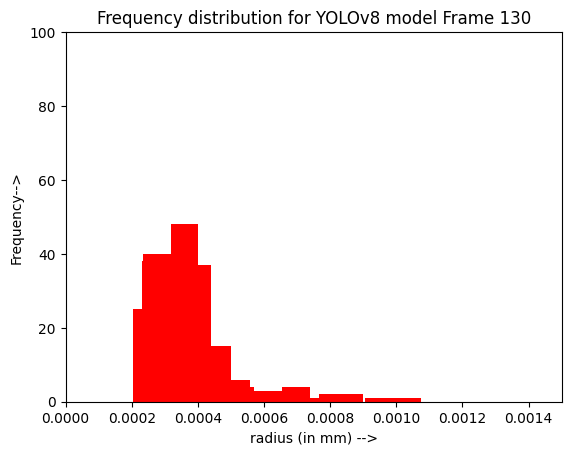

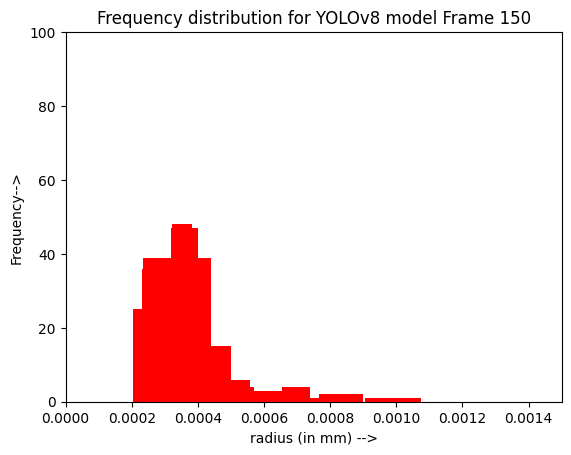

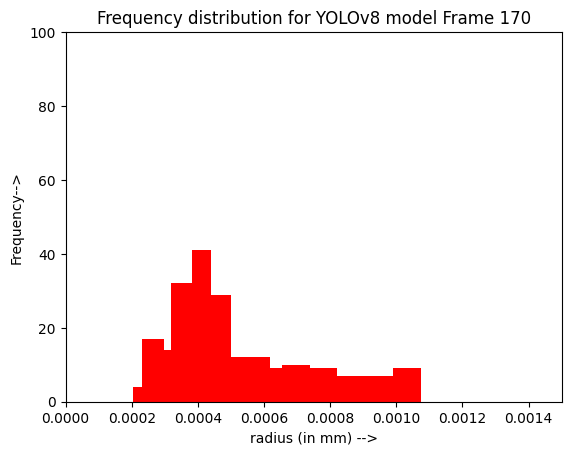

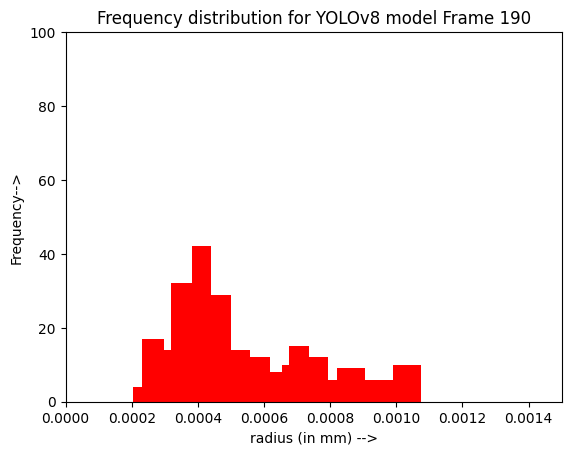

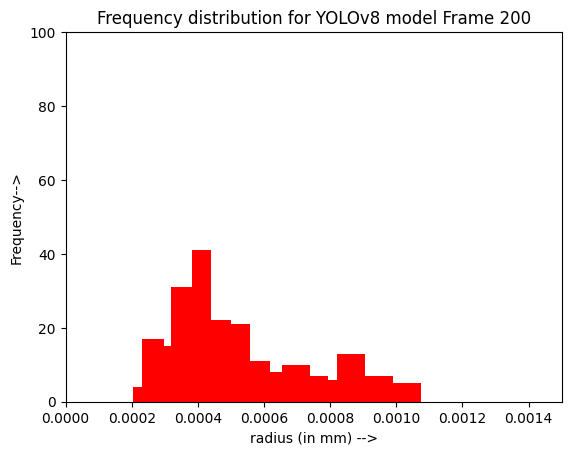

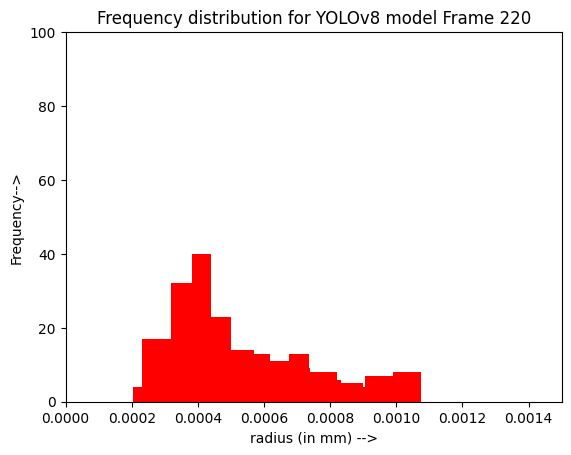

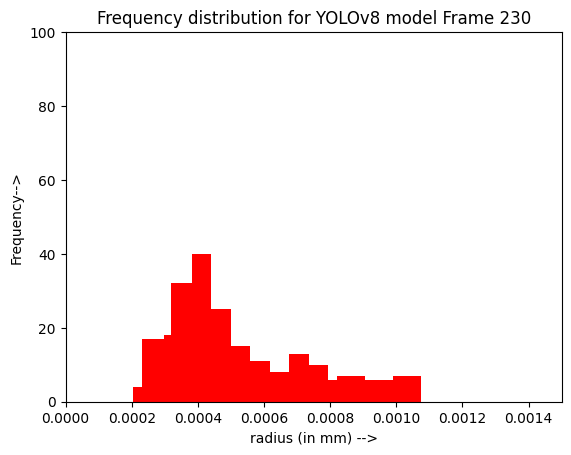

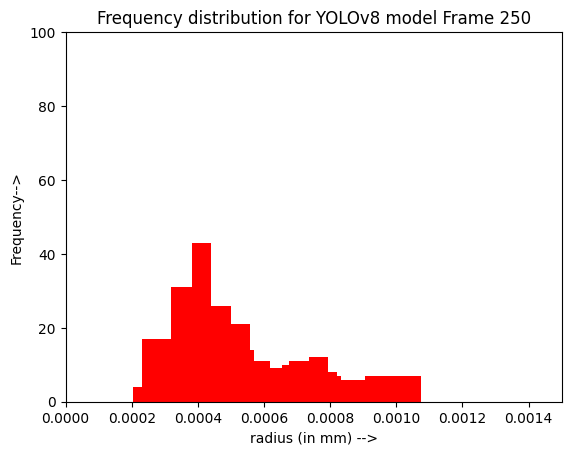

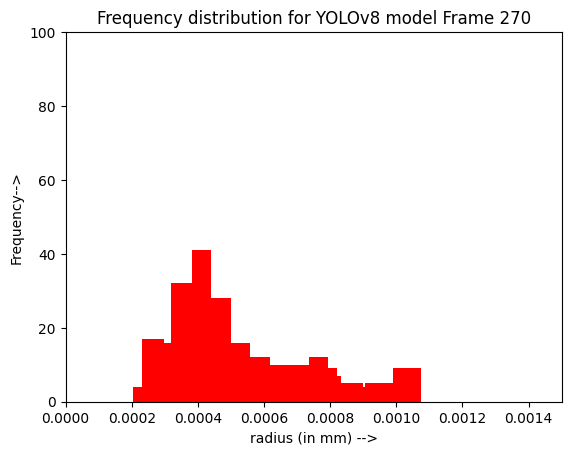

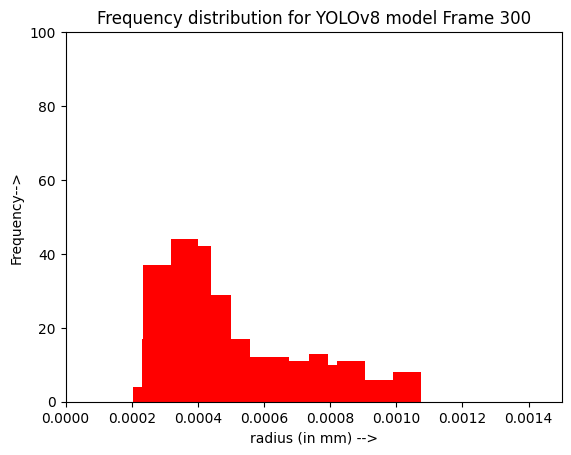

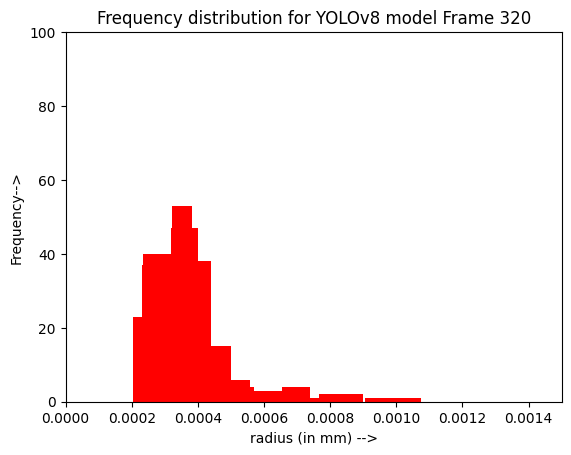

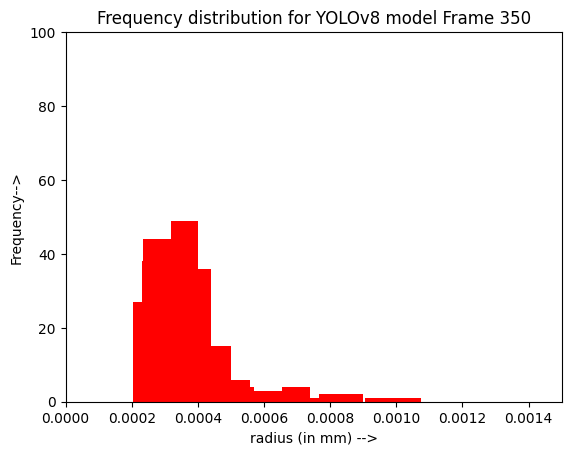

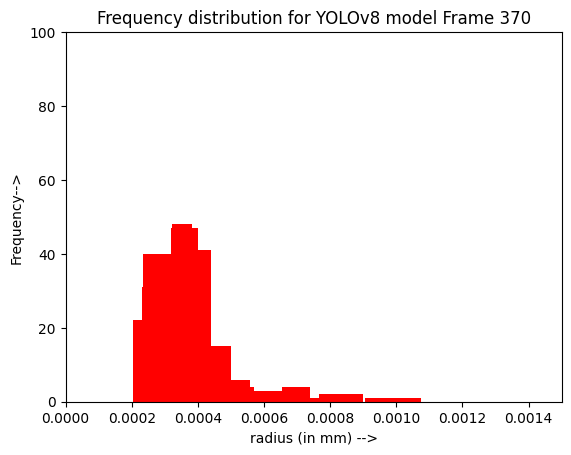

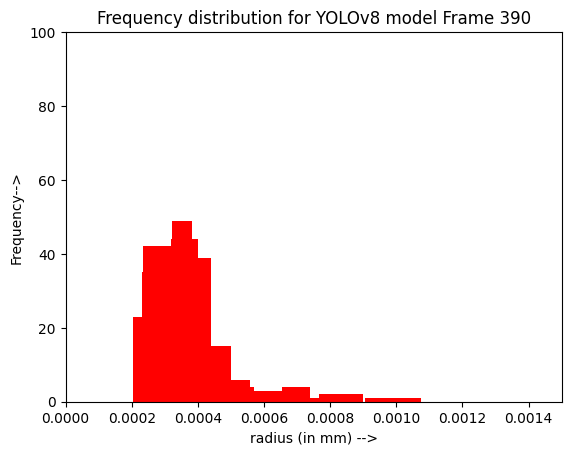

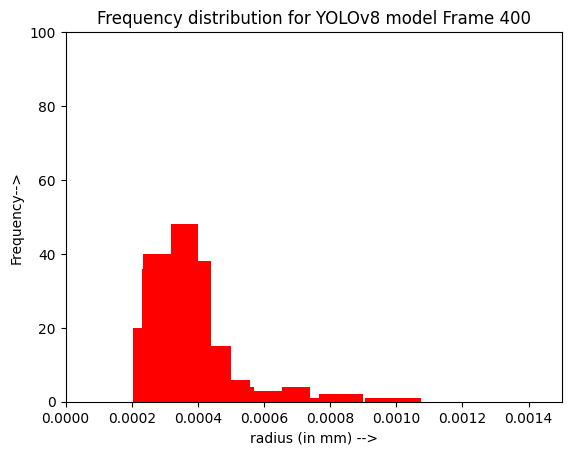

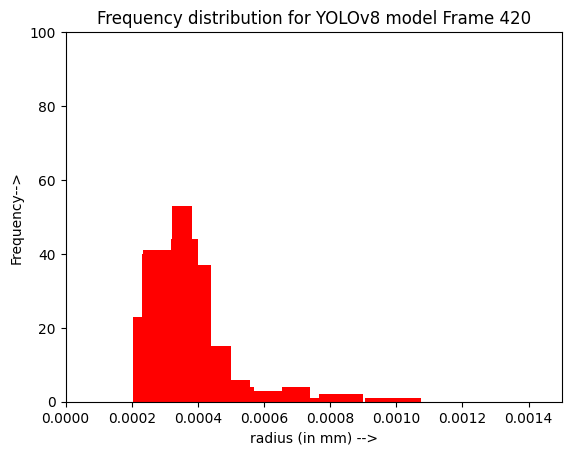

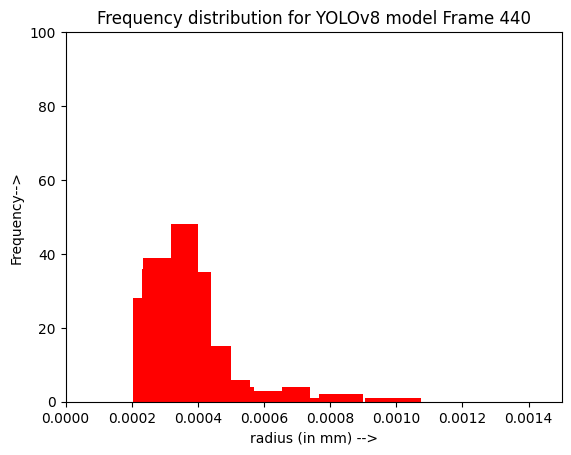

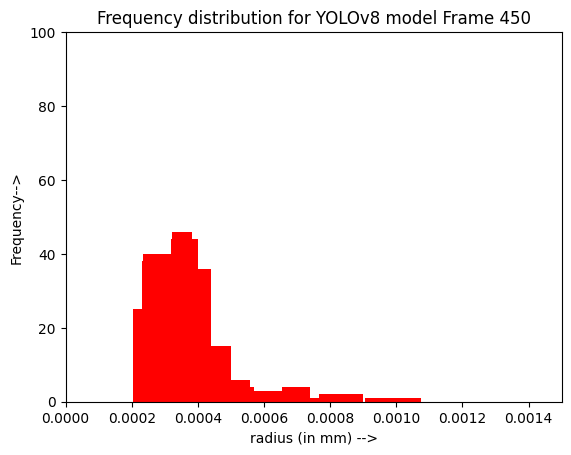

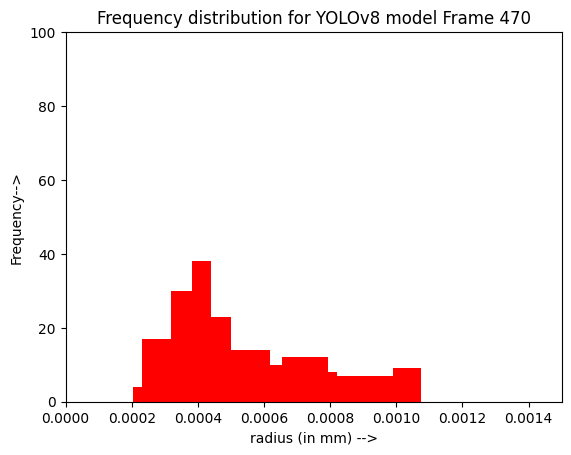

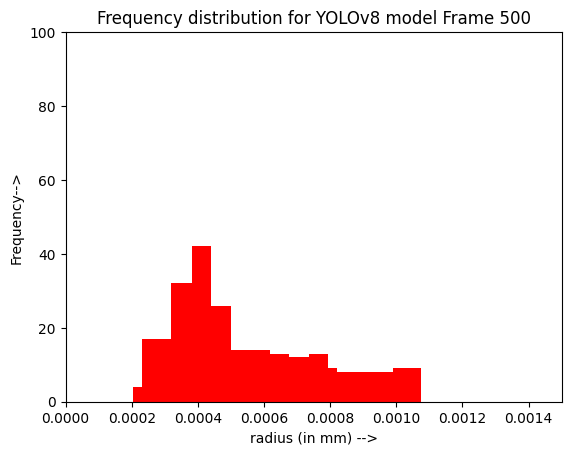

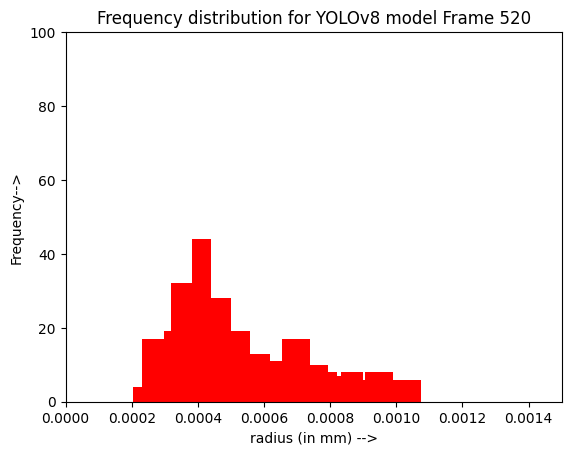

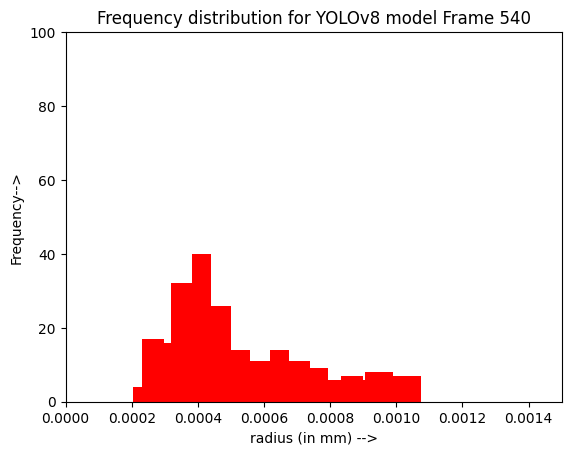

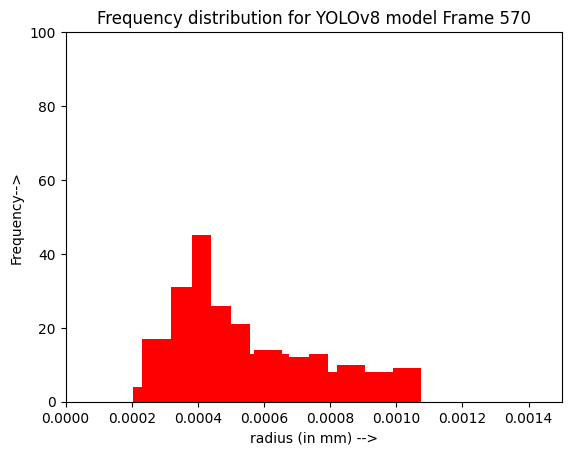

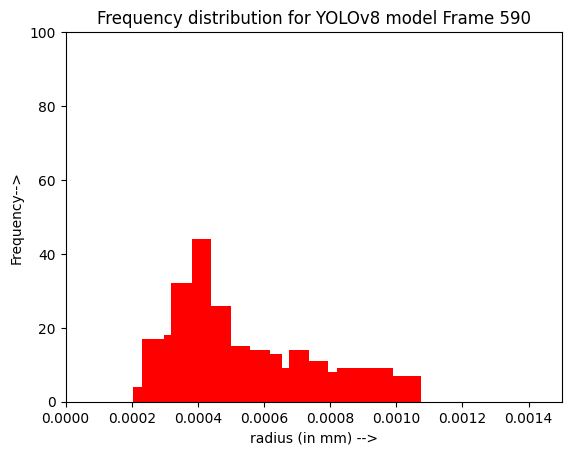

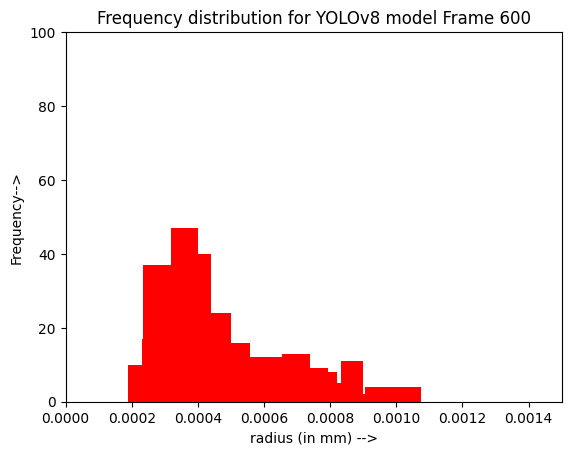

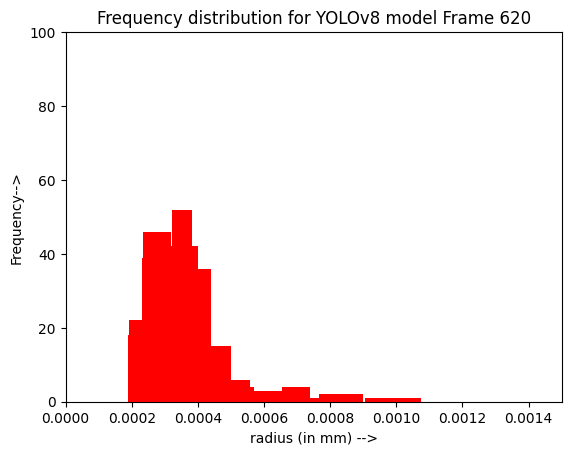

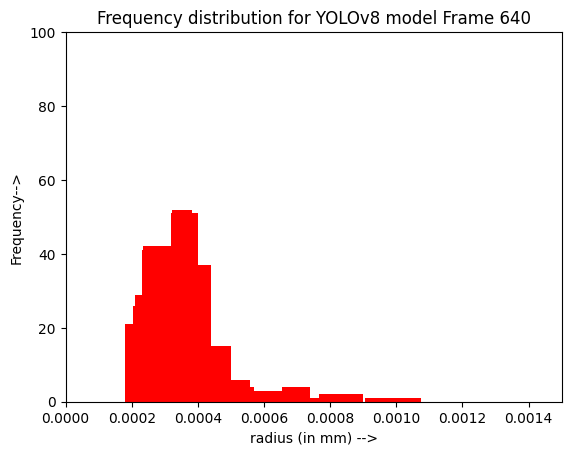

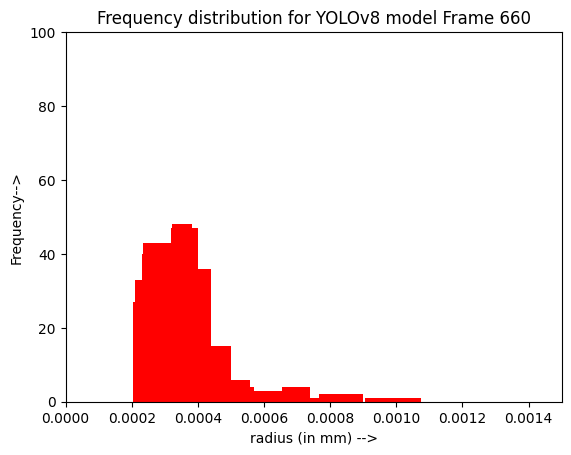

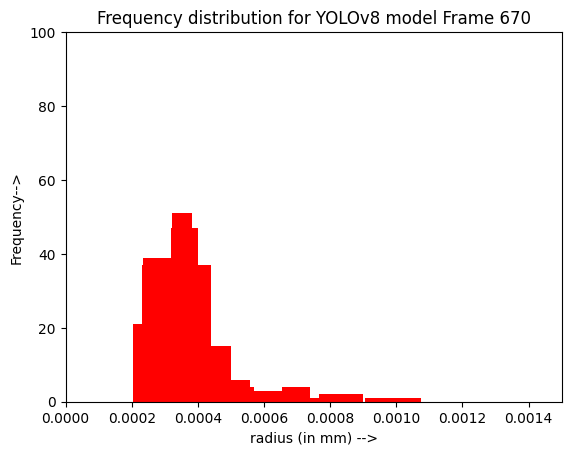

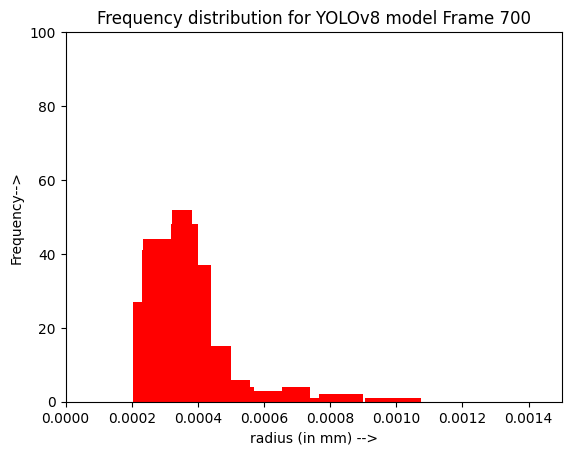

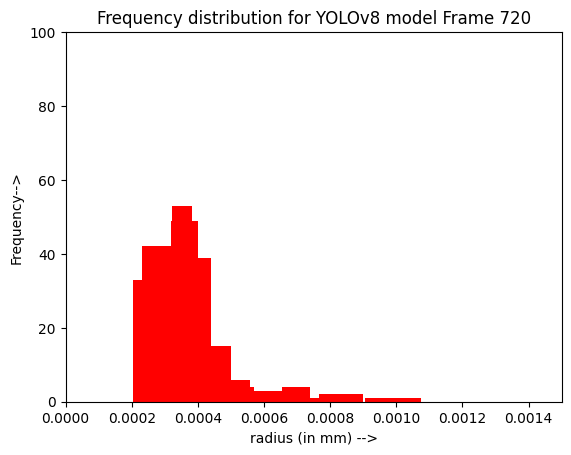

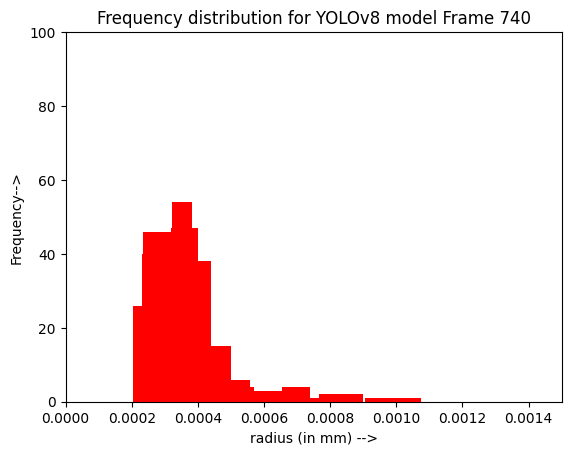

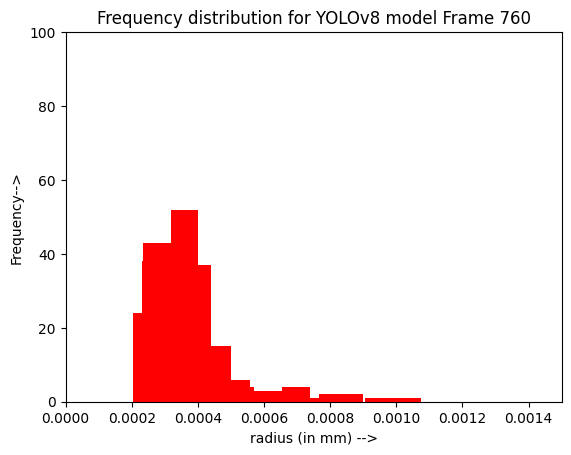

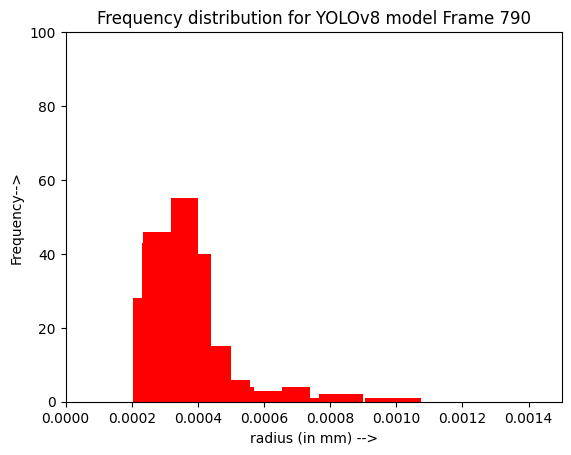

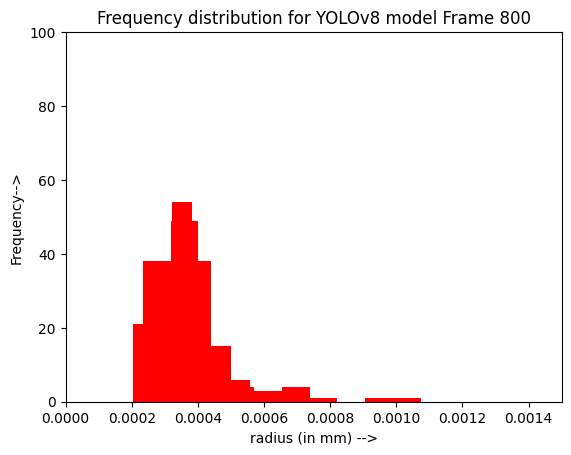

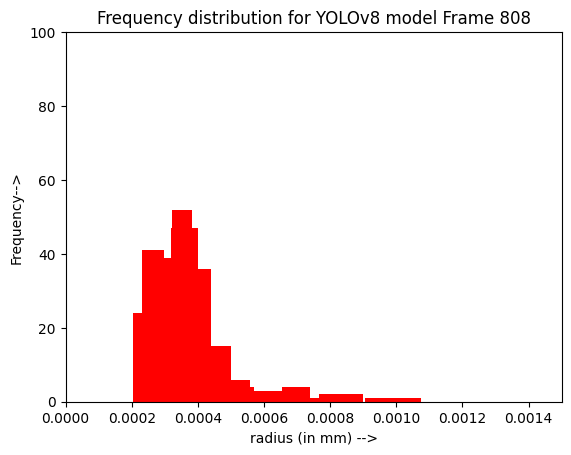

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

folder = "/content/drive/MyDrive/Project Course/NewTest/Labels Predicted"


for i in range(1, 810):
  file_path = f'/content/drive/MyDrive/Project Course/NewTest/Labels Predicted/IMG {i}.csv'
  data = pd.read_csv(file_path, header = None)
  arr = np.sort(data.iloc[:, 3])
  unique_arr = np.unique(arr)
  if len(arr) >= 40 :
    if i < 150:
      noise = np.random.uniform(unique_arr[0], unique_arr[int(len(unique_arr)/2)], int(len(arr)/2+i/100))
      arr = np.concatenate((arr, noise), axis= 0)
    elif i>150 and i<300:
      noise = np.random.uniform(unique_arr[int(len(unique_arr)/2)], unique_arr[int(len(unique_arr)-1)], int(len(arr)/2+i/100))
      arr = np.concatenate((arr, noise), axis= 0)
    elif i>300 and i<450:
      noise = np.random.uniform(unique_arr[0], unique_arr[int(len(unique_arr)/2)], int(len(arr)/2+i/100))
      arr = np.concatenate((arr, noise), axis= 0)
    elif i>450 and i<600:
      noise = np.random.uniform(unique_arr[int(len(unique_arr)/2)], unique_arr[int(len(unique_arr)-1)], int(len(arr)/2+i/100))
      arr = np.concatenate((arr, noise), axis= 0)
    else:
      noise = np.random.uniform(unique_arr[0], unique_arr[int(len(unique_arr)/2)], int(len(arr)/2+i/100))
      arr = np.concatenate((arr, noise), axis= 0)

    plt.hist((arr)/158000, color = "red")
    plt.xlabel("radius (in mm) -->"), plt.ylabel("Frequency-->"), plt.title(f"Frequency distribution for YOLOv8 model Frame {i}")
    plt.xlim(0, 0.0015), plt.ylim(0, 100)
    image_path = f'/content/drive/MyDrive/Project Course/NewTest/Predicted Plots/IMG {i}.jpg'
    plt.savefig(image_path)
    if i%10 == 0:
      plt.show()

In [ ]:
noise = np.random.normal(10, 1, 5)
zeros = np.zeros(10)
len(np.concatenate((noise, zeros), axis = 0)[:-1])

14